In [93]:
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from pandas.core import datetools

import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# feature 24개

- fecha_dato : The table is partitioned for this column

- ncodpers : Customer code

- ind_empleado : Employee index A : active, B : ex-employed, F : filial, N : not employee, P : pasive #직원 여부

- pais_residencia : Customer's Country residence #거주지

- sexo : Customer's sex #성별

- age : Age #나이

- fecha_alta : The date in which the customer became as the first holder of a contract in the bank #처음 가입 날짜

- ind_nuevo : New customer Index. 1 if the customer registered in the last 6 months. #최근 6개월 가입 여부(신규가입자)

- antiguedad : Customer seniority (in months) #유지 개월 수

- indrel : 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month) #주고객층 여부

- ult_fec_cli_1t : Last date as primary customer (if he isn't at the end of the month) #주고객층이었던 마지막 날짜

- indrel_1mes : Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner),P (Potential),3 (former primary), 4(former co-owner) #고객 타입(주고객, 공동소유자, 잠재고객, 이전 주고객, 이전 공동소유자)

- tiprel_1mes : Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential) #월초 고객 타입

- indresi : Residence index (S (Yes) or N (No) if the residence country is the same than the bank country) #거주지 인덱스 : 거주 국가와 은행 국가의 일치 여부

- indext : Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country) #외국인 인덱스 : 출생 국가와 은행 국가의 일치 여부

- conyuemp : Spouse index. 1 if the customer is spouse of an employee #배우자 인덱스 : 직원의 배우자인 경우

- canal_entrada : channel used by the customer to join #가입한 채널

- indfall : Deceased index. N/S #사망 여부

- tipodom : Addres type. 1, primary address #주소 타입 : 1일 경우 주요 주소

- cod_prov : Province code (customer's address) #거주지 지역 코드

- nomprov : Province name #지역 이름

- ind_actividad_cliente : Activity index (1, active customer; 0, inactive customer) #활동 인덱스 : 1, 0

- renta : Gross income of the household #총 수입

- segmento : segmentation: 01 - VIP, 02 - Individuals 03 - college graduated #구분 : VIP / 개인 / 대학졸업자

# Class 24개

- ind_ahor_fin_ult1 : Saving Account #저축통장
- ind_aval_fin_ult1 : Guarantees #보증
- ind_cco_fin_ult1 : Current Accounts #예금
- ind_cder_fin_ult1 : Derivada Account #파생계좌
- ind_cno_fin_ult1	Payroll Account #월급통장
- ind_ctju_fin_ult1 : Junior Account #어린이계좌
- ind_ctma_fin_ult1	: Más particular Account #특별계좌1
- ind_ctop_fin_ult1 : particular Account #특별계좌2
- ind_ctpp_fin_ult1 : particular Plus Account #특별계좌3
- ind_deco_fin_ult1 : Short-term deposits #단기예금
- ind_deme_fin_ult1 : Medium-term deposits #중기예금
- ind_dela_fin_ult1 : Long-term deposits #장기예금
- ind_ecue_fin_ult1	: e-account #온라인계좌
- ind_fond_fin_ult1	: Funds #펀드
- ind_hip_fin_ult1 : Mortgage #담보대출
- ind_plan_fin_ult1 : Pensions #연금 
- ind_pres_fin_ult1 : Loans #대출
- ind_reca_fin_ult1 : Taxes #세금 
- ind_tjcr_fin_ult1 : Credit Card #신용카드
- ind_valo_fin_ult1 : Securities #증권
- ind_viv_fin_ult1 : Home Account #내집마련계좌
- ind_nomina_ult1 : Payroll #월급
- ind_nom_pens_ult1 : Pensions #연금
- ind_recibo_ult1 : Direct Debit #자동이체

In [42]:
1.3e5

130000.0

In [43]:
limit_rows = 1000000
train = pd.read_csv("train.csv", dtype={"sexo":str, "ind_nuevo":str, 
                                  "ult_fec_cli_1t":str, 
                                  "indext":str}, nrows=limit_rows)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
train.ncodpers = train.ncodpers.astype(int)

In [ ]:
#Returns a random sample of items from an axis of object.
unique_ids = pd.Series(train["ncodpers"].unique()) #ncodpers : 고객넘버
unique_id = unique_ids.sample(n=1.3e5)
train = train[train.ncodpers.isin(unique_id)]

In [45]:
train["ncodpers"].count()

1000000

In [46]:
#pandas.to_numeric(arg, errors='raise', downcast=None)
#If ‘coerce’, then invalid parsing will be set as NaN
train["age"] = pd.to_numeric(train["age"], errors="coerce") 
train["antiguedad"] = pd.to_numeric(train["antiguedad"], errors="coerce") 
train["indrel_1mes"] = pd.to_numeric(train["indrel_1mes"], errors="coerce") 

In [49]:
train["age"].dtypes

dtype('float64')

### Missing Data

In [50]:
train.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                       10782
fecha_alta                10782
ind_nuevo                 10782
antiguedad                10782
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
segmento                  10895
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

In [51]:
train = train.drop(["ult_fec_cli_1t", "conyuemp"], axis=1)

In [52]:
train["renta"] = train["renta"].transform(lambda x: x.fillna(x.mean()))

In [53]:
train[train["antiguedad"] < 0] = 0

In [54]:
#total num of products
train["tot_products"] = train.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
train["tot_products"] = pd.to_numeric(train["tot_products"], errors="coerce") 

In [55]:
train['pais_residencia'].describe()

count     989218
unique       114
top           ES
freq      982260
Name: pais_residencia, dtype: object

In [56]:
train['ind_empleado'].value_counts()

N    988256
B       387
A       287
F       282
0         4
S         2
Name: ind_empleado, dtype: int64

In [57]:
#for visualization, remove minority
train = train.loc[lambda train: train.pais_residencia == "ES", :]
train = train.loc[lambda train: train.ind_empleado == "N", :]

In [58]:
train = train.dropna(axis=0)

In [59]:
train.count(0)

fecha_dato               981088
ncodpers                 981088
ind_empleado             981088
pais_residencia          981088
sexo                     981088
age                      981088
fecha_alta               981088
ind_nuevo                981088
antiguedad               981088
indrel                   981088
indrel_1mes              981088
tiprel_1mes              981088
indresi                  981088
indext                   981088
canal_entrada            981088
indfall                  981088
tipodom                  981088
cod_prov                 981088
nomprov                  981088
ind_actividad_cliente    981088
renta                    981088
segmento                 981088
ind_ahor_fin_ult1        981088
ind_aval_fin_ult1        981088
ind_cco_fin_ult1         981088
ind_cder_fin_ult1        981088
ind_cno_fin_ult1         981088
ind_ctju_fin_ult1        981088
ind_ctma_fin_ult1        981088
ind_ctop_fin_ult1        981088
ind_ctpp_fin_ult1        981088
ind_deco

- 클래스 개수

In [169]:
train_y = train[['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']]

train_count = train_y.sum()
train_count = train_count.drop(train_count[train_count == 0].index).sort_values(ascending=False)[:30]
count_data = pd.DataFrame({'count' :train_count})
count_data.head(24)

,count
ind_cco_fin_ult1,740095.0
ind_ctop_fin_ult1,209548.0
ind_recibo_ult1,164677.0
ind_ecue_fin_ult1,104883.0
ind_cno_fin_ult1,104542.0
ind_nom_pens_ult1,78637.0
ind_ctpp_fin_ult1,71369.0
ind_nomina_ult1,70811.0
ind_reca_fin_ult1,68967.0
ind_dela_fin_ult1,66270.0


### 1. 기본 정보

- 나이

Text(0,0.5,'Number of customers')

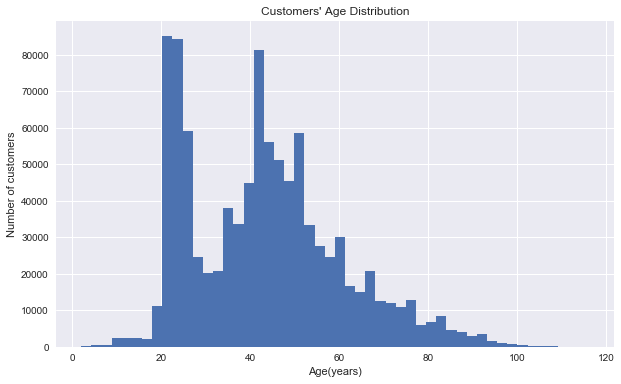

In [61]:
train['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

Text(0,0.5,'Number of products')

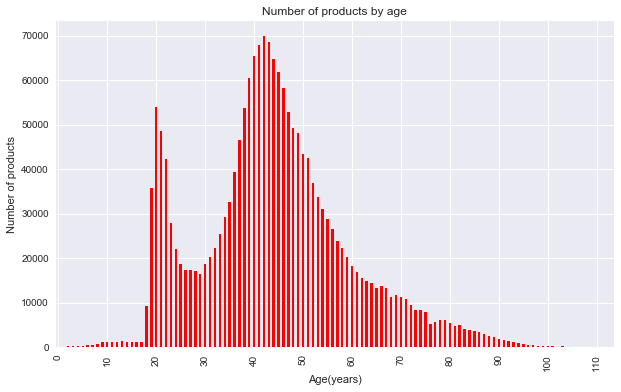

In [154]:
df_a = train.groupby(['age'])['tot_products'].agg('sum')

df_a.plot(kind='bar', colormap='autumn', legend=None) 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)])
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products')

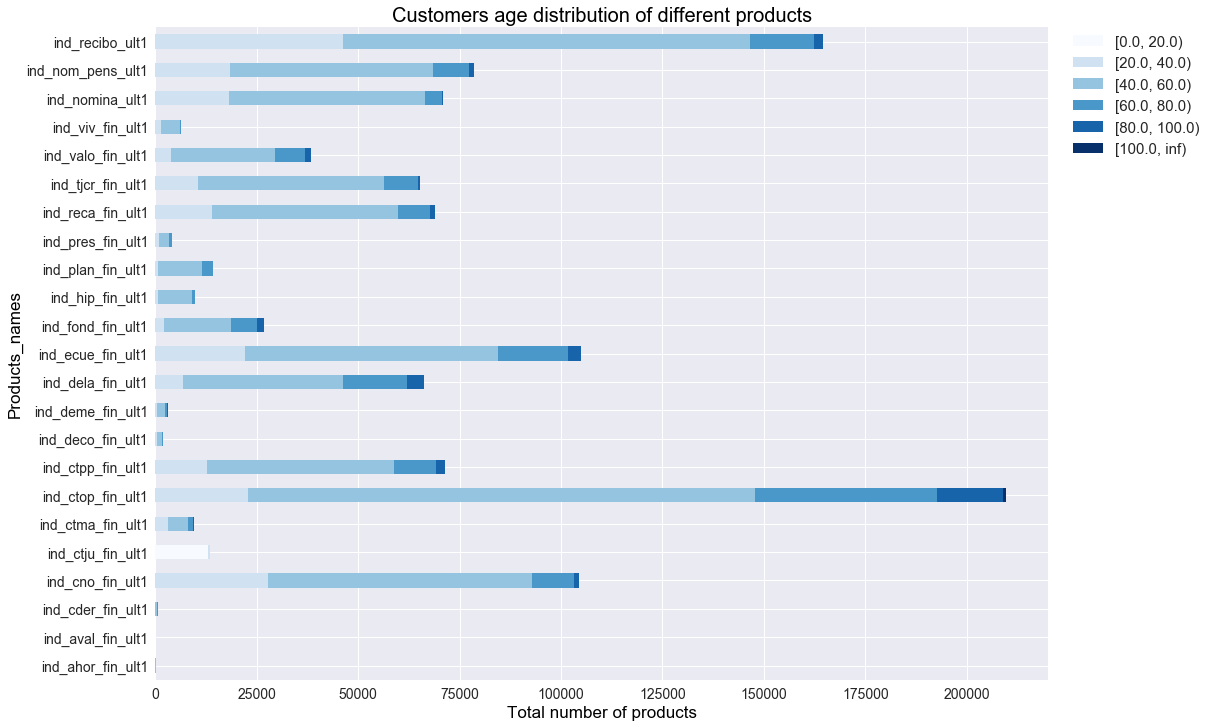

In [157]:
df_a = (train.groupby(pd.cut(train['age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Blues')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15})

- 성별, 외국인, 사망여부

Text(0.5,1,'death')

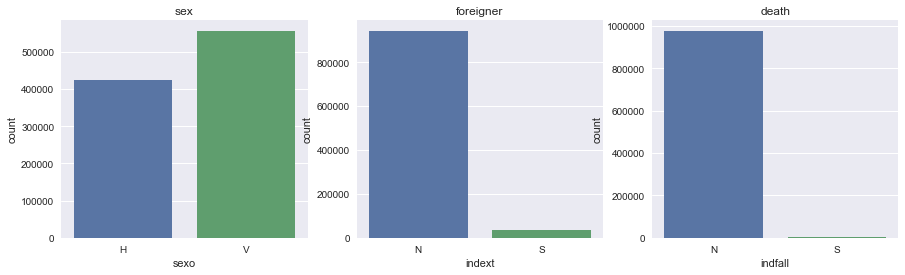

In [100]:
f, ax = plt.subplots(1, 3, figsize = (15, 4))
sns.countplot(x='sexo', data=train, ax=ax[0])
ax[0].set_title('sex')
sns.countplot(x='indext', data=train, ax=ax[1])
ax[1].set_title('foreigner')
sns.countplot(x='indfall', data=train, ax=ax[2])
ax[2].set_title('death')

In [70]:
df_s = train.loc[:, ['sexo']].join(train.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_s = df_s.groupby(['sexo']).sum()
df_s = df_s.T
df_s

sexo,H,V
ind_ahor_fin_ult1,46.0,129.0
ind_aval_fin_ult1,9.0,26.0
ind_cco_fin_ult1,327545.0,412550.0
ind_cder_fin_ult1,83.0,496.0
ind_cno_fin_ult1,41303.0,63239.0
ind_ctju_fin_ult1,6442.0,7023.0
ind_ctma_fin_ult1,3931.0,5725.0
ind_ctop_fin_ult1,78415.0,131133.0
ind_ctpp_fin_ult1,27523.0,43846.0
ind_deco_fin_ult1,829.0,1175.0


Text(0.5,1,'Popularity of products by sex')

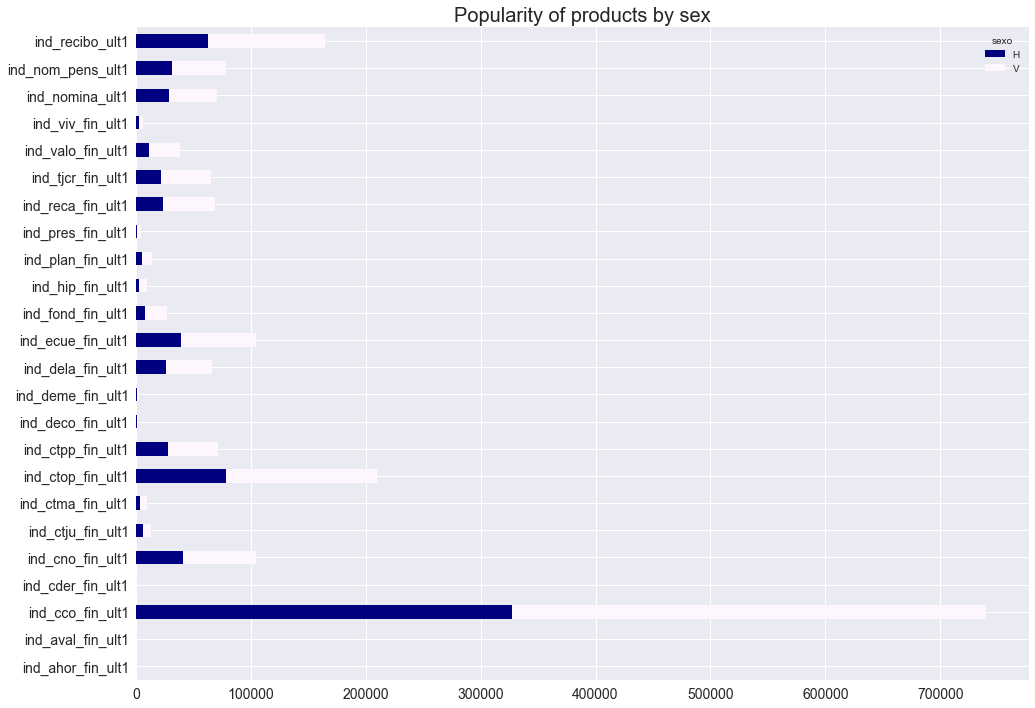

In [71]:
df_s.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex', fontsize=20)
#성별별로 다른 양상 보이는 상품은?

In [73]:
train["tot_products"].value_counts()

1.0     555217
2.0     190406
3.0      78370
4.0      44520
5.0      29992
0.0      29188
6.0      22830
7.0      15888
8.0       8644
9.0       3972
10.0      1401
11.0       490
12.0       136
13.0        28
14.0         5
15.0         1
Name: tot_products, dtype: int64

- 수입

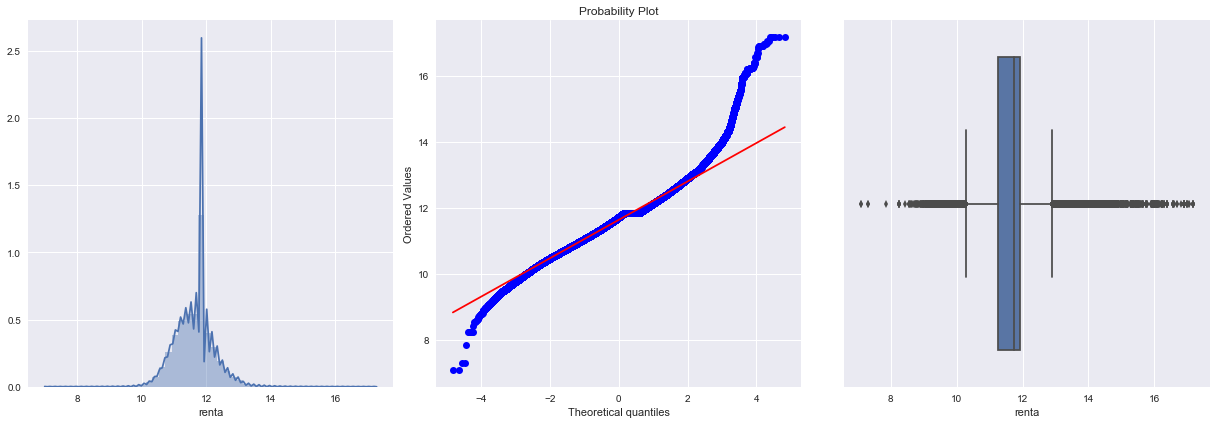

count    981088.000000
mean         11.645235
std           0.588254
min           7.092349
25%          11.260102
50%          11.726166
75%          11.910186
max          17.179158
Name: renta, dtype: float64 

Skewness: 0.254965
Kurtosis: 1.921806


In [96]:
renta = np.log(train['renta'])

plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(renta)

plt.subplot(132)
stats.probplot(renta, plot=plt)

plt.subplot(133)
sns.boxplot(renta)
plt.tight_layout()
plt.show()

print(renta.describe(),"\n")

print("Skewness: %f" % renta.skew())
print("Kurtosis: %f" % renta.kurt())

In [87]:
df_i = (train.groupby(pd.cut(train['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False))
                     .sum())

In [75]:
df_i["tot_products"]

renta
[0.0, 60000.0)          211668.0
[60000.0, 120000.0)     627900.0
[120000.0, 180000.0)    651561.0
[180000.0, 240000.0)    189461.0
[240000.0, inf)         193166.0
Name: tot_products, dtype: float64

In [88]:
df_i = df_i.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_i = df_i.T
df_i

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,14.0,34.0,65.0,30.0,32.0
ind_aval_fin_ult1,2.0,6.0,6.0,15.0,6.0
ind_cco_fin_ult1,106217.0,260898.0,253699.0,58723.0,60558.0
ind_cder_fin_ult1,63.0,163.0,212.0,70.0,71.0
ind_cno_fin_ult1,10685.0,35311.0,35919.0,11555.0,11072.0
ind_ctju_fin_ult1,989.0,4194.0,5038.0,1730.0,1514.0
ind_ctma_fin_ult1,1104.0,3411.0,3408.0,957.0,776.0
ind_ctop_fin_ult1,19697.0,66593.0,75789.0,23305.0,24164.0
ind_ctpp_fin_ult1,6099.0,23155.0,25572.0,8153.0,8390.0
ind_deco_fin_ult1,227.0,703.0,756.0,161.0,157.0


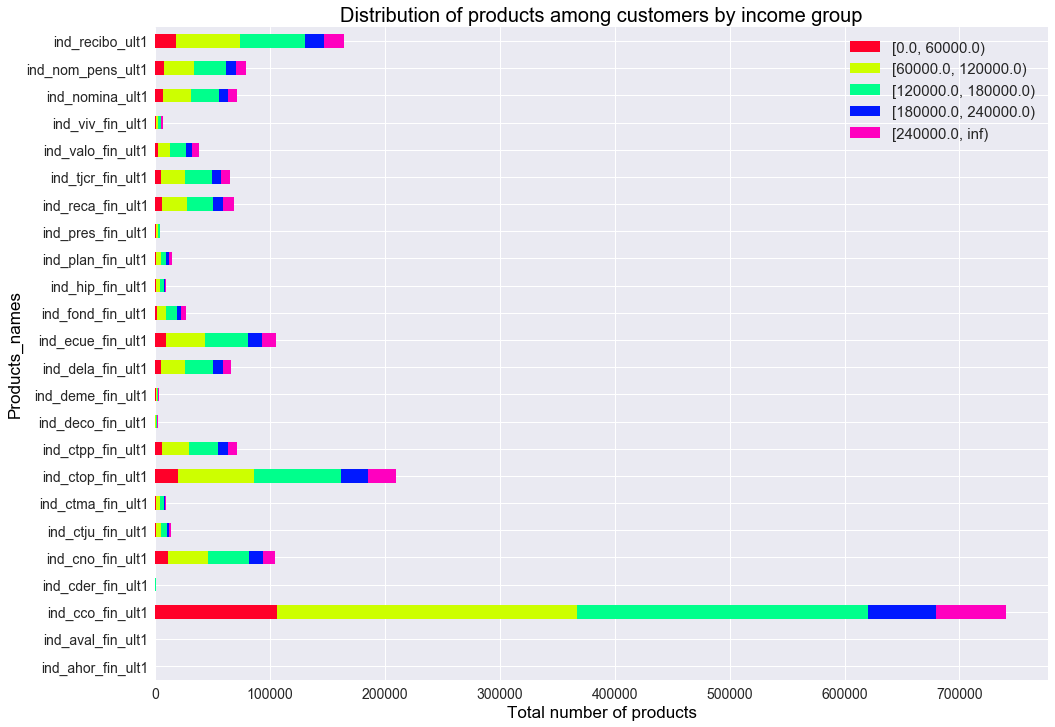

In [89]:
df_i.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

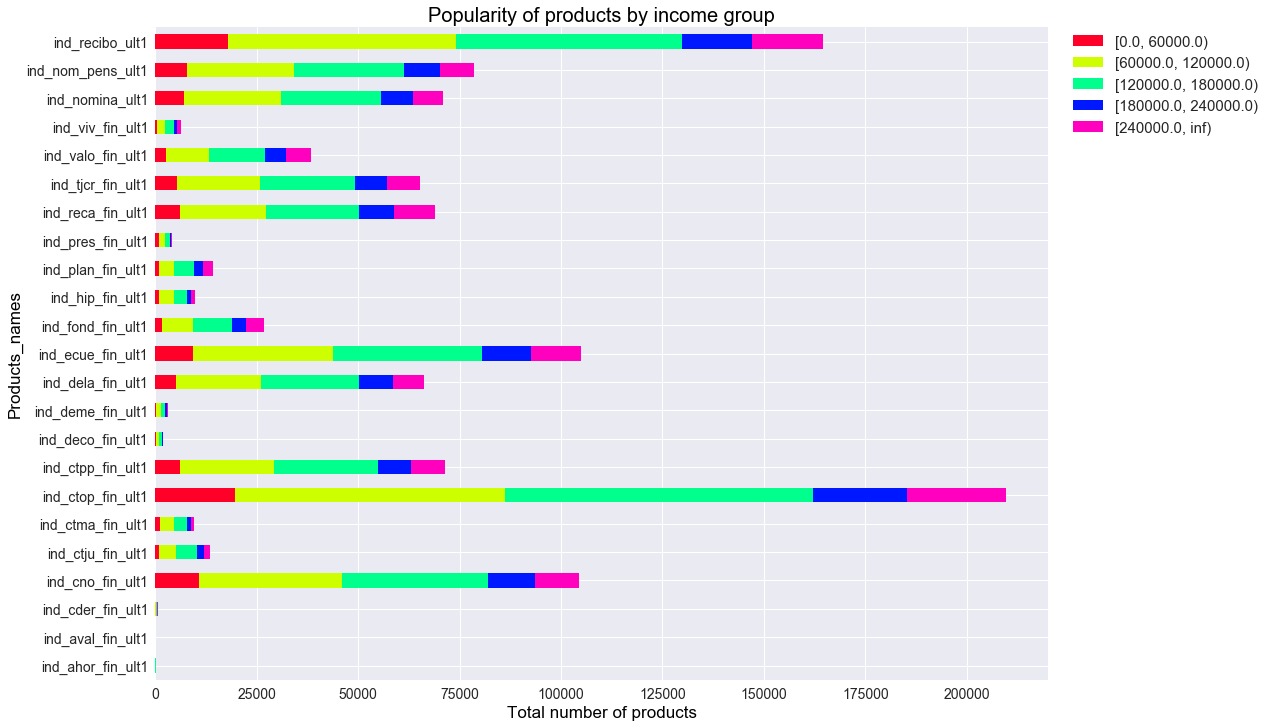

In [90]:
exclude = ['ind_cco_fin_ult1']
df_i = df_i.T
df_i = df_i.drop(exclude, axis=1).T

df_i.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Popularity of products by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

- 거주지

Text(0.5,1,'primary adress')

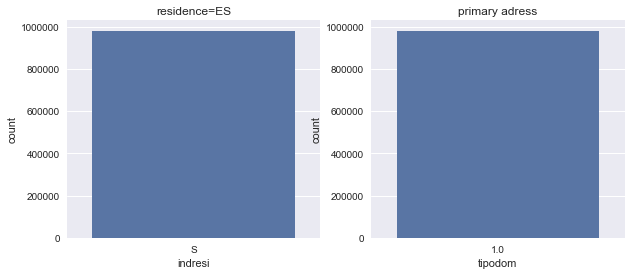

In [109]:
f, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.countplot(x='indresi', data=train, ax=ax[0])
ax[0].set_title('residence=ES')
sns.countplot(x='tipodom', data=train, ax=ax[1])
ax[1].set_title('primary adress')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

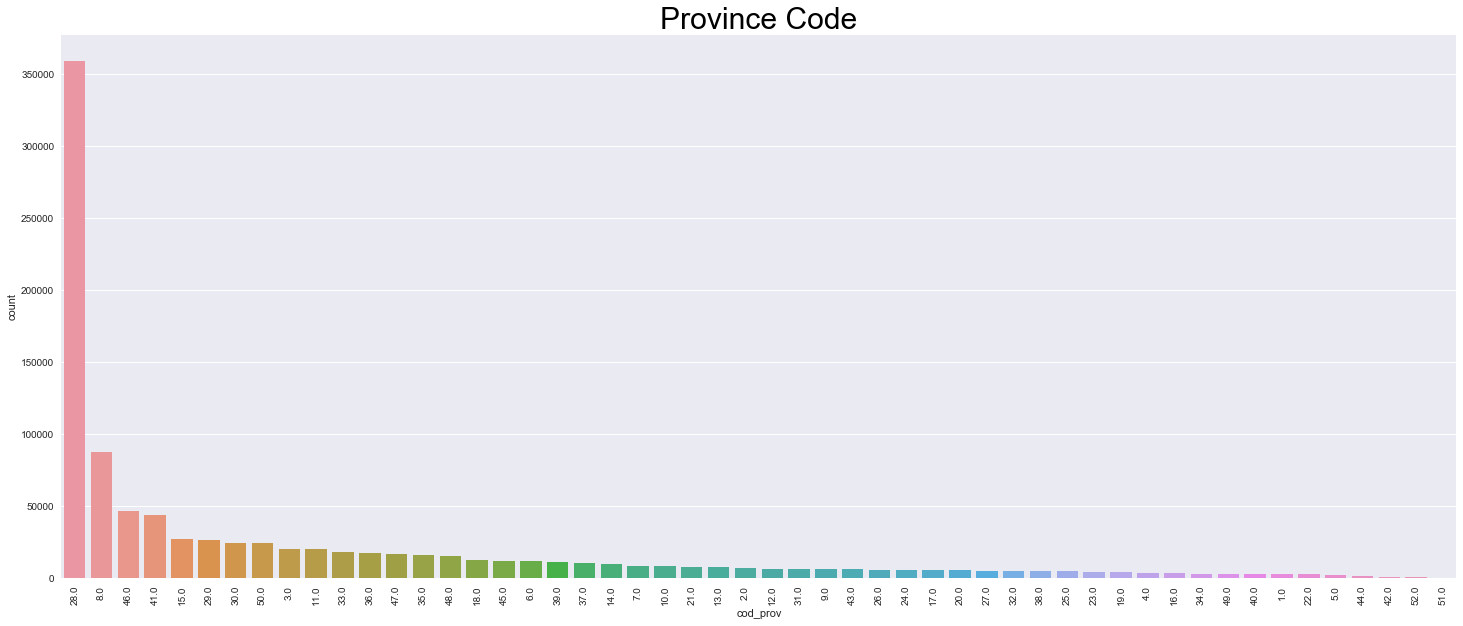

In [110]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='cod_prov', data=train, order=train['cod_prov'].value_counts().index)
plt.title('Province Code', fontsize=30, color='black')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

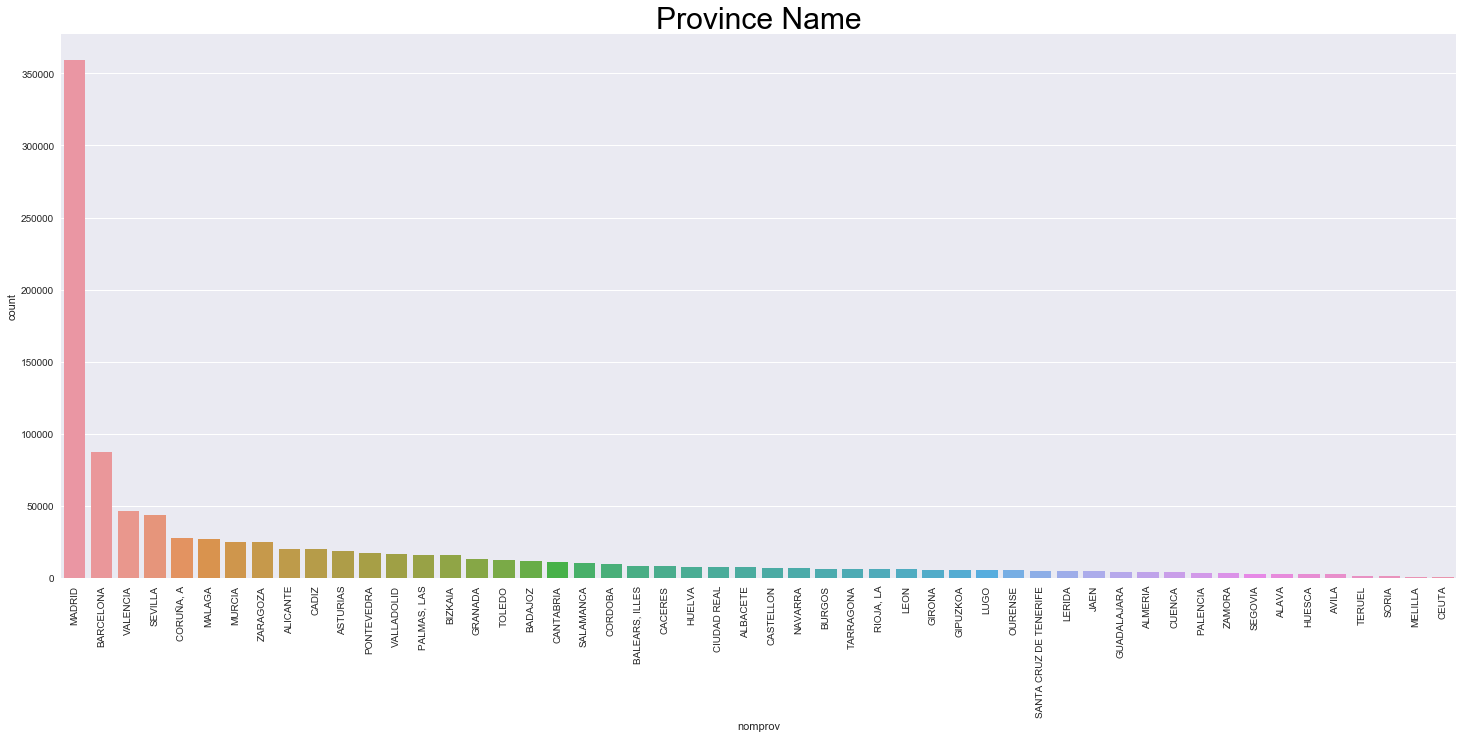

In [111]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='nomprov', data=train, order=train['nomprov'].value_counts().index)
plt.title('Province Name', fontsize=30, color='black')
plt.xticks(rotation=90)

### 2. 고객 타입

- 직원

Text(0.5,1,'Employee Index')

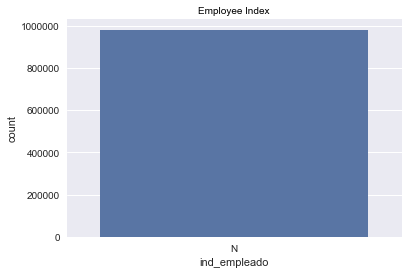

In [127]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='ind_empleado', data=train, order=train['ind_empleado'].value_counts().index)
plt.title('Employee Index', fontsize=10, color='black')

- Primary Customer

Text(0.5,1,'Customer Type(biginning of the month)')

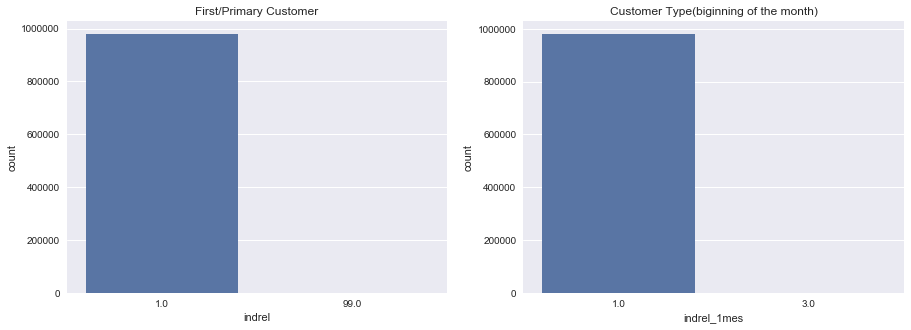

In [132]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot(x='indrel', data=train, ax=ax[0])
ax[0].set_title('First/Primary Customer')
sns.countplot(x='indrel_1mes', data=train, ax=ax[1])
ax[1].set_title('Customer Type(biginning of the month)')

#indrel_1mes : Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner),P (Potential),3 (former primary), 4(former co-owner)

- Activity

Text(0.5,1,'Activity index ')

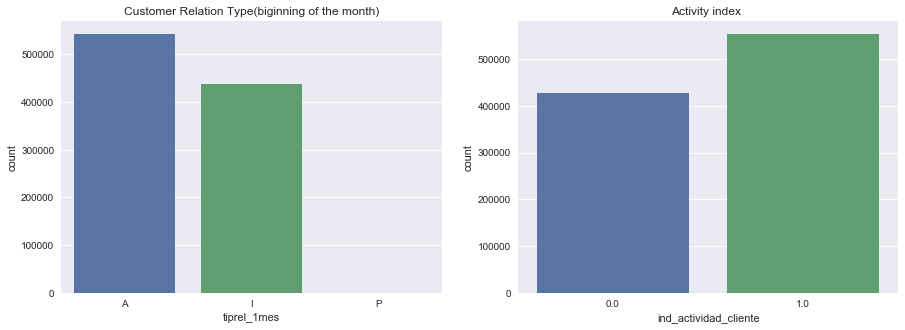

In [133]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot(x='tiprel_1mes', data=train, ax=ax[0])
ax[0].set_title('Customer Relation Type(biginning of the month)')
sns.countplot(x='ind_actividad_cliente', data=train, ax=ax[1])
ax[1].set_title('Activity index ')
#tiprel_1mes : Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)

Text(0.5,1,'Popularity of products by activity')

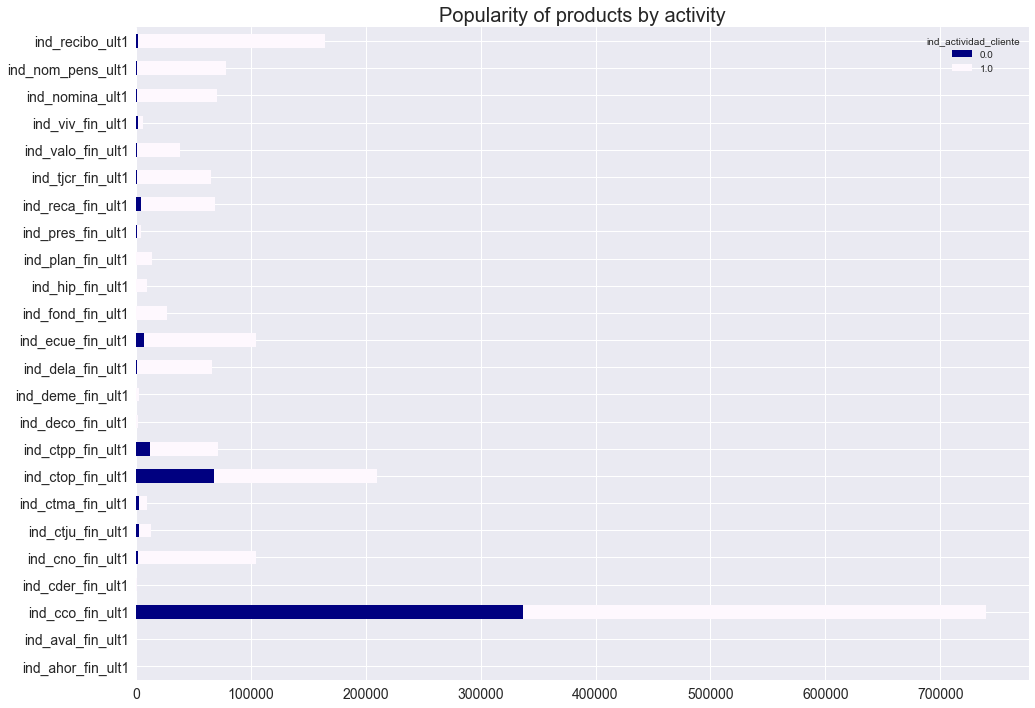

In [140]:
df_ac = train.loc[:, ['ind_actividad_cliente']].join(train.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_ac = df_ac.groupby(['ind_actividad_cliente']).sum()
df_ac = df_ac.T

df_ac.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by activity', fontsize=20)

Text(0.5,1,'Customer Segmentaion')

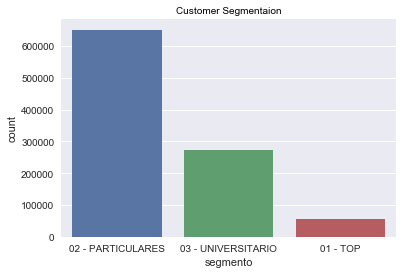

In [134]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='segmento', data=train, order=train['segmento'].value_counts().index)
plt.title('Customer Segmentaion', fontsize=10, color='black')

Text(0.5,1,'Popularity of products by segmentation')

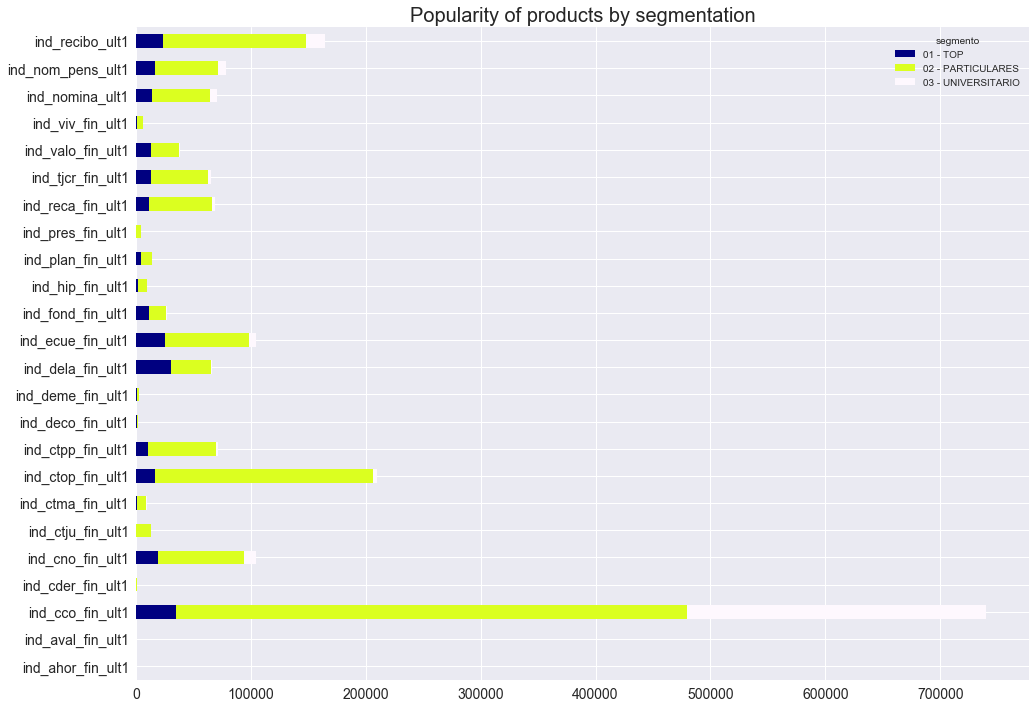

In [138]:
df_se = train.loc[:, ['segmento']].join(train.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_se = df_se.groupby(['segmento']).sum()
df_se = df_se.T

df_se.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by segmentation', fontsize=20)

In [152]:
# age & activity?

df_ac = train.loc[:, ['age']].join(train.loc[:, 'ind_actividad_cliente': 'ind_actividad_cliente'])
df_ac = df_ac.groupby(['age']).sum()
df_ac = df_ac.T

df_ac

age,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,115.0,116.0
ind_actividad_cliente,9.0,83.0,133.0,181.0,187.0,244.0,320.0,445.0,659.0,801.0,955.0,994.0,949.0,976.0,819.0,859.0,790.0,866.0,4580.0,13315.0,16845.0,13938.0,11548.0,6630.0,5260.0,4680.0,4860.0,5373.0,5456.0,5373.0,6224.0,6794.0,7347.0,8332.0,9433.0,10362.0,12137.0,14333.0,16361.0,17701.0,18877.0,19451.0,19649.0,19090.0,18006.0,17221.0,16172.0,14685.0,13768.0,13417.0,12162.0,11981.0,10484.0,9489.0,8704.0,8268.0,7499.0,6889.0,6307.0,5804.0,5335.0,4746.0,4434.0,4275.0,4172.0,3798.0,3949.0,3884.0,3164.0,3449.0,3304.0,3201.0,2800.0,2444.0,2603.0,2244.0,1601.0,1649.0,1862.0,1826.0,1622.0,1503.0,1501.0,1231.0,1156.0,1076.0,951.0,872.0,735.0,577.0,531.0,460.0,426.0,286.0,289.0,170.0,127.0,108.0,56.0,85.0,63.0,35.0,22.0,30.0,14.0,22.0,6.0,14.0,8.0,4.0,10.0,6.0,6.0,2.0


### 3. 가입 정보

- 유지 개월 수

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

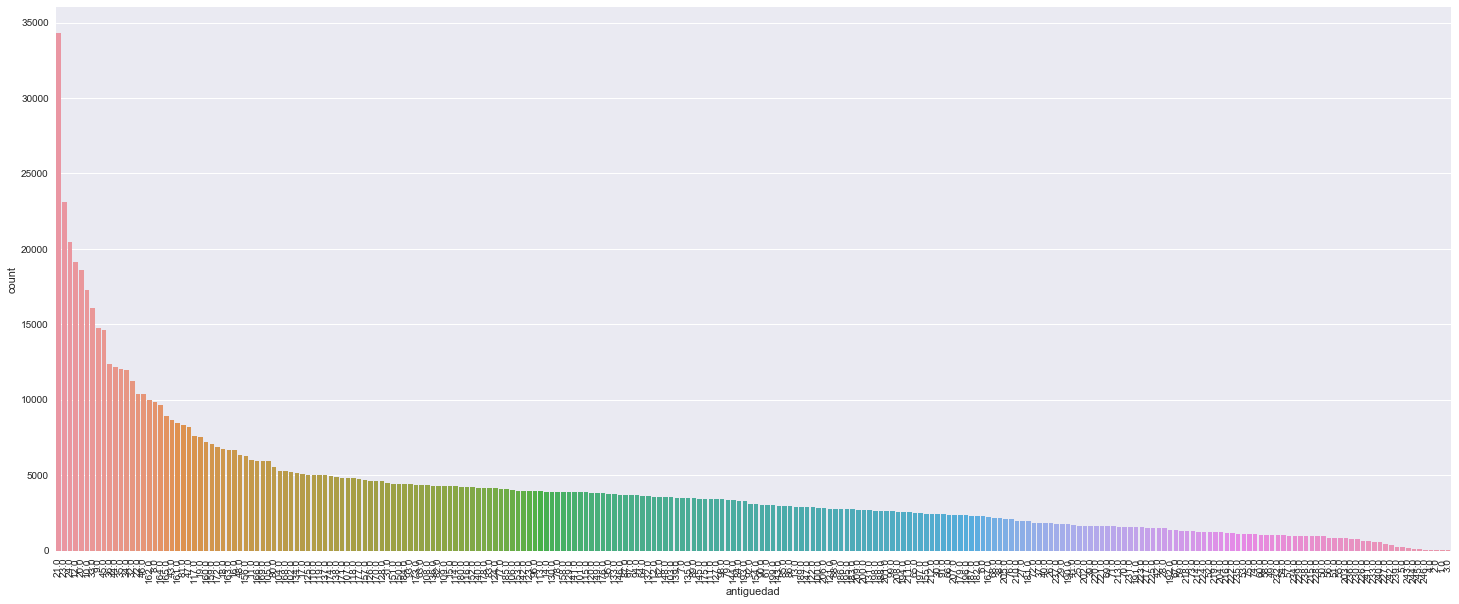

In [158]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='antiguedad', data=train, order=train['antiguedad'].value_counts().index)
plt.xticks(rotation=90)

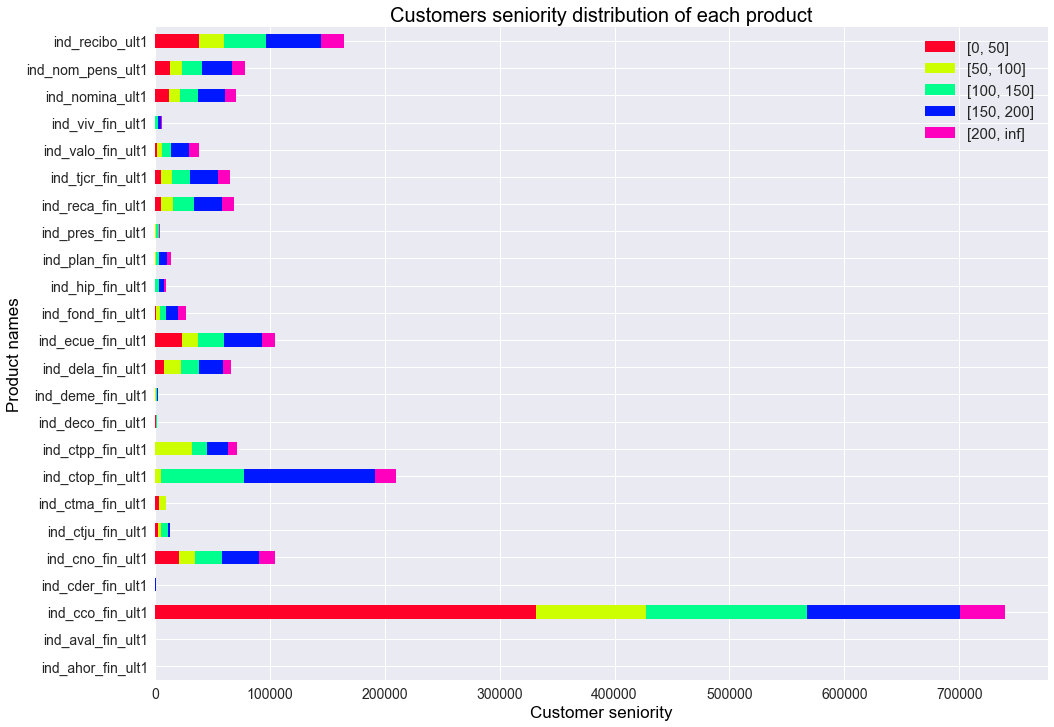

In [160]:
df_a = train.loc[:, ['antiguedad']].join(train.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
df_a = (df_a.groupby(pd.cut(df_a['antiguedad'], [0,50,100,150,200, pd.np.inf], right=False))
                     .sum())
exclude = ["antiguedad"]
df_a = df_a.drop(exclude, axis=1).T

df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 

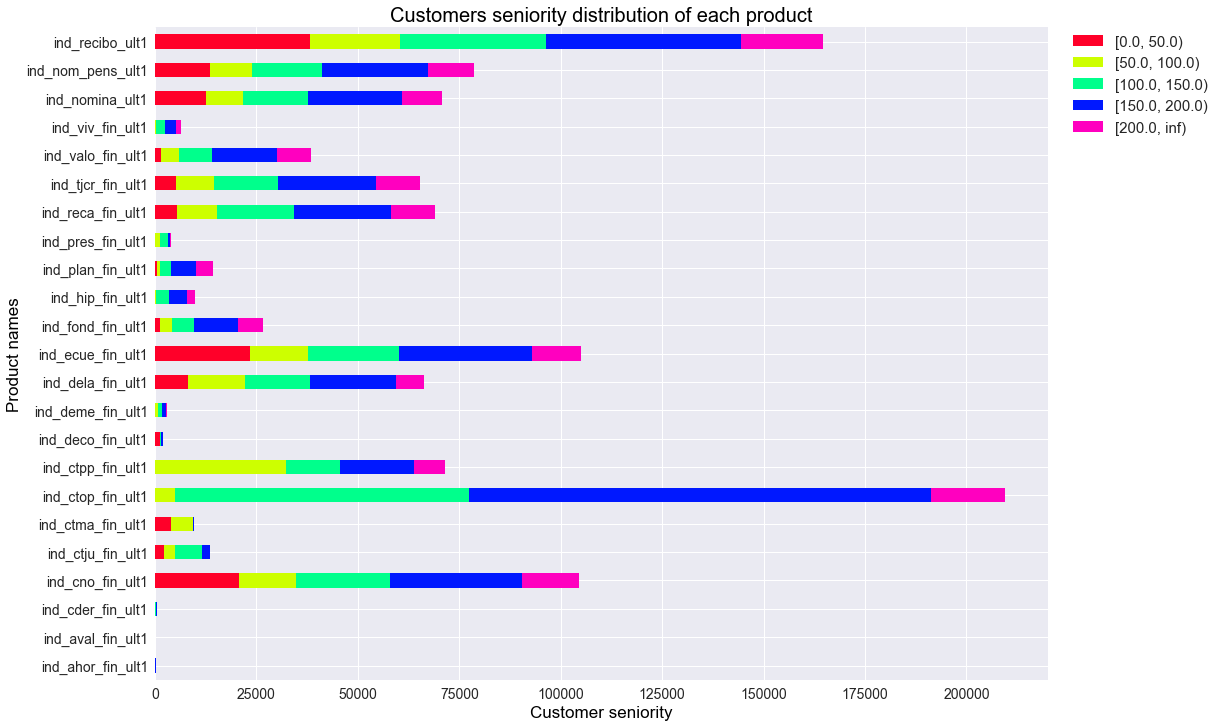

In [161]:
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15})

In [164]:
df_a = train["tot_products"].value_counts()
df_a = pd.DataFrame(df_a)

count = train["ncodpers"].count()
df_a["percentage"] = (df_a["tot_products"]/count)*100
df_a

,tot_products,percentage
1.0,555217,56.591967
2.0,190406,19.407637
3.0,78370,7.988070
4.0,44520,4.537819
5.0,29992,3.057014
0.0,29188,2.975064
6.0,22830,2.327008
7.0,15888,1.619427
8.0,8644,0.881063
9.0,3972,0.404857


56.26% of the customers have used only one product while 15.57% used two products and there is also 12.22% of the customers who have not used any products at all.

상품 개수 별로의 차이는?

- 가입 채널

In [166]:
train['canal_entrada'].value_counts().head(15)

KAT    310223
KFC    258009
KHE    249027
KFA     36537
KAS      8060
KAG      7423
KAA      6168
KAY      6077
KAB      5921
KHK      5916
KHD      5834
KCC      4726
KAE      4699
KBZ      4318
RED      4287
Name: canal_entrada, dtype: int64

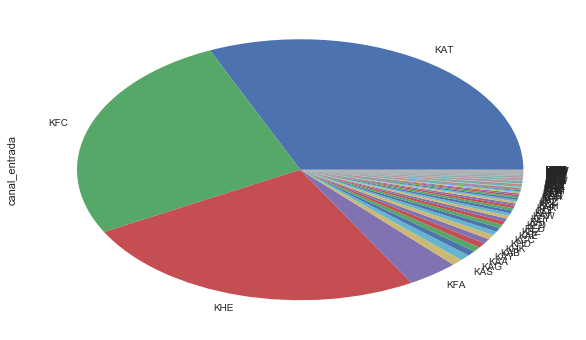

In [167]:
train["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 